In [2]:
# Import Libs
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from matplotlib.colors import ListedColormap

In [4]:
# Load the Iris dataset
K = [2, 5, 7]
iris = datasets.load_iris()
X = iris.data[:, 2:4]
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

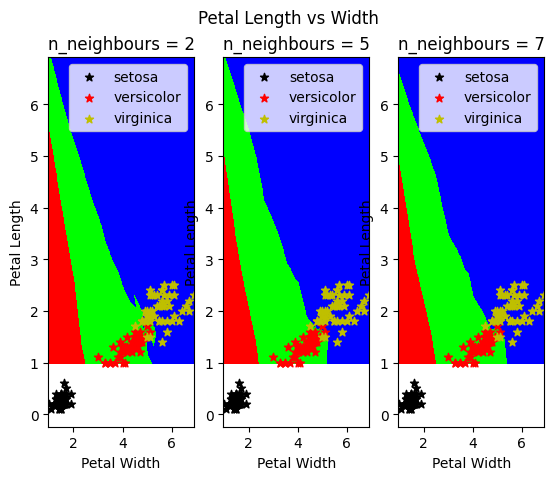

In [9]:
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])
plt.close('all')
fig, axs = plt.subplots(1, 3)
axs = axs.ravel()
h = 0.02
for j, ax in zip(K, axs):
    knn = KNeighborsClassifier(n_neighbors=j)
    knn.fit(X, y)
    x_min, x_max = X[:, 0].min() - h, X[:, 0].max() + h
    y_min, y_max = X[:, 0].min() - h, X[:, 0].max() + h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    P = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    P = P.reshape(xx.shape)
    ax.pcolormesh(xx, yy, P, cmap=cmap_bold, shading='auto')
    
    for y_val, (color, name) in enumerate(zip(['k', 'r', 'y'], iris.target_names)):
        ax.scatter(X[:, 0] [y == y_val], X[:, 1] [y == y_val], c = color, marker='*', label=name)
        ax.set_xlabel('Petal Width')
        ax.set_ylabel('Petal Length')
        ax.legend()
        ax.set_title(f'n_neighbours = {j}')
        
fig.suptitle('Petal Length vs Width')
plt.show()